# Coursera_Capstone Project
###### This is my final project for the IBM Data Science (Coursera)

### Business Problem

Traffic  accidents  cause  serious  threat to  the  human life worldwide, the economy and reduces efficiency in transportation. Some factors that  contribute to the risk of collisions are; vehicle design, speed of operation, road design, road environment, weather conditions, lighting conditions, driving skills, impairment due to alcohol or drugs, and behavior, notably distracted driving, speeding, and street racing.


It is therefore  important to build a model for accident severity prediction for effective performance of road traffic systems for improved safety and minimized collisions.


###### Stakeholders
Stakeholder involved in this includes:
1. Carowners
2. Healthcare workers
3. Government
4. Commuters
5. Logistics
6. Professional Drivers

### Data Understanding

The data to be used for this project is raw data from the SDOT Trafic Management Division, containing all types of collisions that occured Seattle city from 2004 to 2020

The data contains 194,673 samples and have 37 features. we will use SEVERITYCODE as our dependent variable Y. Since the observations are quite large, we will have to work on the missing value and delete the unrelated columns first. Then we can select the factor which may have more impact on the accidents, such as weather, road condition, light condition, collision type, either driver was involved by influencing drugs or alcohol, junction type, speeding or not speeding.

##### Data Desription
1. COLLISIONTYPE: Collision type
2. WEATHER: Weather conditions during the time of the collision
3. ROADCOND: The condition of the road during the collision
4. LIGHTCOND: The light condition during the collision
5. UNDERINFL: Whether or not a driver involved was under the influence of the drugs or alcohol
6. SPEEDING:speeding or not speeding
7. ADDRTYPE: Type of area


##### Import neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### Load Data

In [2]:
df=pd.read_csv('Data-Collisions.csv')

C:\Users\jemab\OneDrive\Documents\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### EDA

In [3]:
df.shape

(194673, 38)

In [4]:
df.isna().sum().to_frame().rename(columns={0:'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


Text(0.5, 1.0, 'Annual traffic incidents in Seattle by Severity')

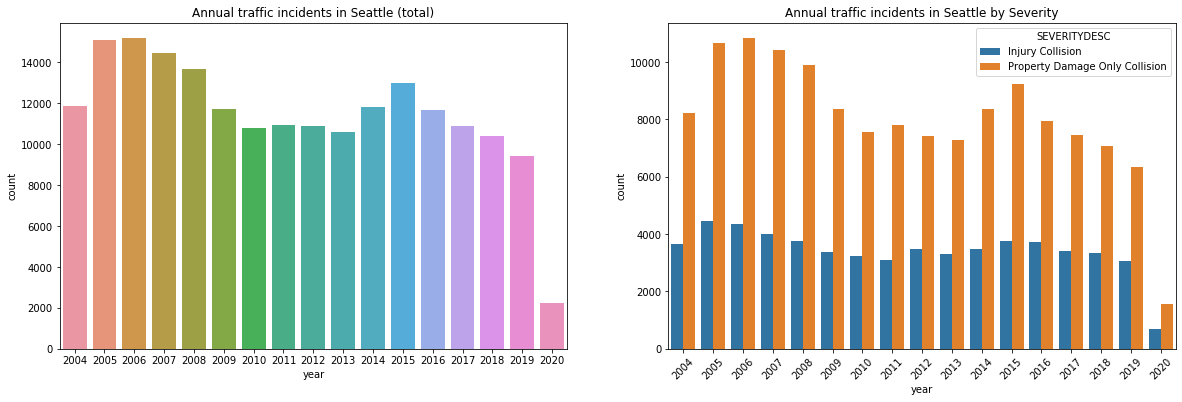

In [5]:
# Bar chart visualizatin of annual amount of traffic incidents in Seattle

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()#.plot(kind='bar')
sns.countplot(x="year", data=df, ax=ax1)
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2)
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle (total)')
ax2.set_title('Annual traffic incidents in Seattle by Severity')

In [6]:
# Check the values for each SEVERITYDESC
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [7]:
# Check the values for each SEVERITYCODE
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [8]:
# Value counts of collision type
df['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


Text(0.5, 1.0, 'Collision Type Occurance')

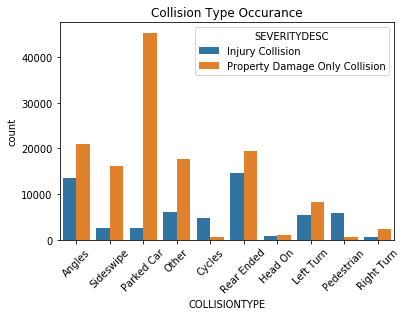

In [9]:
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Collision Type Occurance')

In [10]:
# Value counts of Weather Condition
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

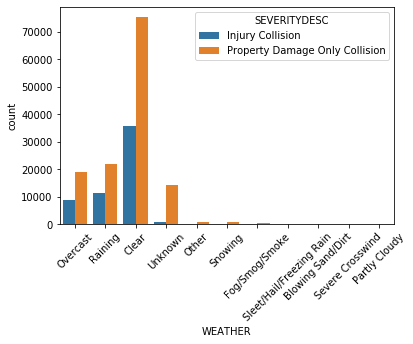

In [11]:
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

In [12]:
# Value counts of Road Condition
df['ROADCOND'].value_counts().sort_values(ascending=False).to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

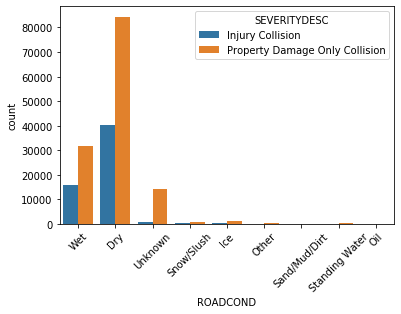

In [13]:
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

In [14]:
# Value counts of Light Condition
df['LIGHTCOND'].value_counts().sort_values(ascending=False).to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

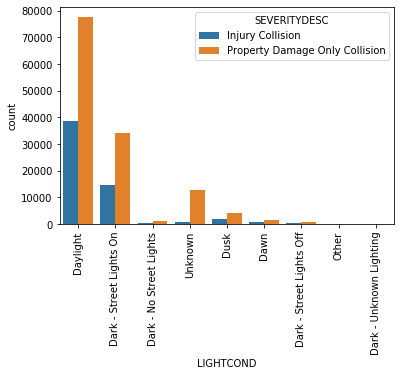

In [15]:
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

In [16]:
# Value counts for either drivers were influenced of drugs or alcohol
df['UNDERINFL'].value_counts().sort_values(ascending=False).to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

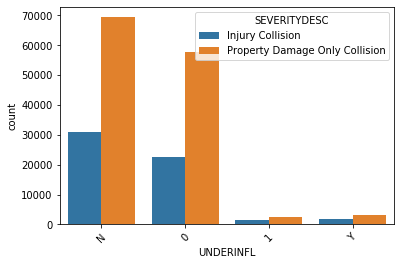

In [17]:
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

In [18]:
# Value counts of junction type
df['JUNCTIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,JUNCTIONTYPE
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

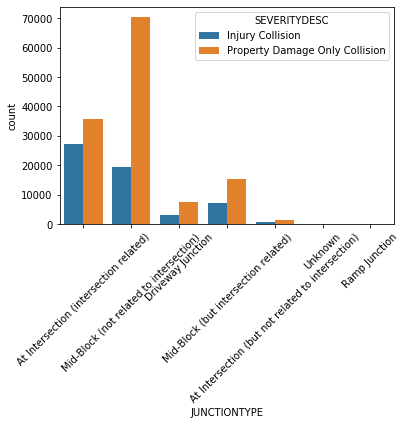

In [19]:
sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

In [20]:
# Value counts of junction type
df['SPEEDING'].value_counts().sort_values(ascending=False).to_frame()

,SPEEDING
Y,9333


(array([0]), <a list of 1 Text xticklabel objects>)

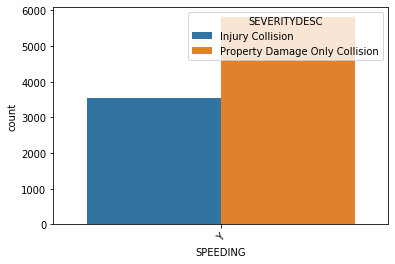

In [21]:
sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

### DATA PREPARATION

##### Handlng Missing Data

In [22]:
df['ADDRTYPE'].fillna('Unknown',inplace=True)
df['ROADCOND'].fillna('Other',inplace=True)
df['COLLISIONTYPE'].fillna('Other',inplace=True)
df['WEATHER'].fillna('Other',inplace=True)
df['LIGHTCOND'].fillna('Other', inplace=True)
df['SPEEDING'].fillna('N', inplace=True)
df['UNDERINFL'].fillna('N',inplace=True)
df['JUNCTIONTYPE'].dropna(axis=0)

0          At Intersection (intersection related)
1         Mid-Block (not related to intersection)
2         Mid-Block (not related to intersection)
3         Mid-Block (not related to intersection)
4          At Intersection (intersection related)
                           ...                   
194668    Mid-Block (not related to intersection)
194669    Mid-Block (not related to intersection)
194670     At Intersection (intersection related)
194671     At Intersection (intersection related)
194672    Mid-Block (not related to intersection)
Name: JUNCTIONTYPE, Length: 188344, dtype: object

In [23]:
df['UNDERINFL'].replace(to_replace=['1'],value=['Y'],inplace=True)
df['UNDERINFL'].replace(to_replace=['0'],value=['N'],inplace=True)

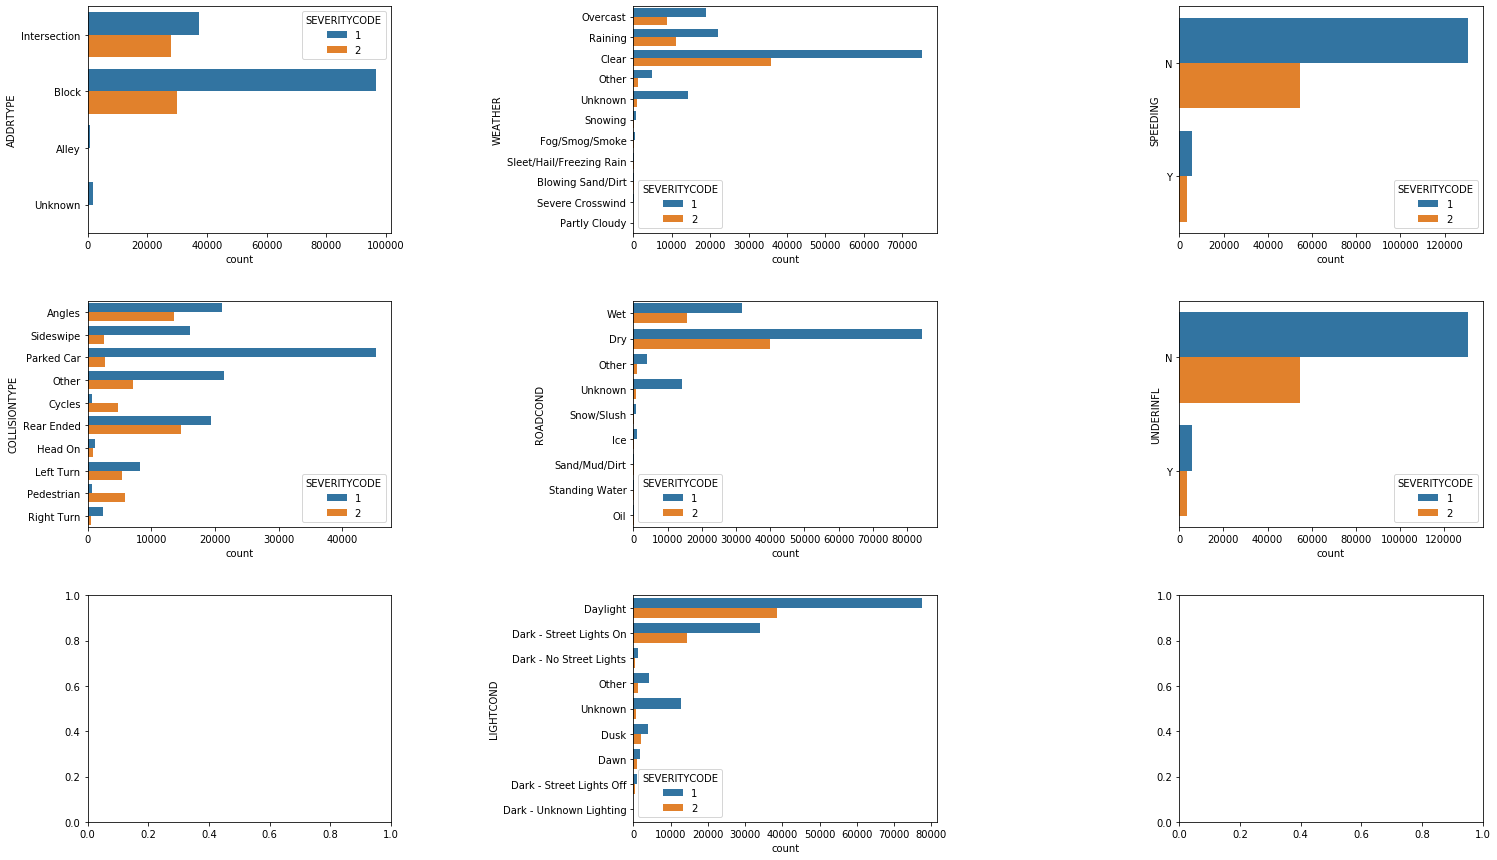

In [24]:
fig, axs = plt.subplots(ncols=3, nrows=3,figsize=(25,15))
plt.subplots_adjust(hspace =0.3, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df, ax=axs[1, 0])
sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="SEVERITYCODE", data=df, ax=axs[1, 2])

df.shape shows that there are 194673 samples and 38 features
df.isna shows that about 40% of the data was missing


### FEATURE SELECTION

###### Target Variable

In [25]:
target = df['SEVERITYCODE']

###### Feature Variables

###### Feature Encoding, Normalization, train/test split

###### convert categorical variables into numeric using the code from pandas:

In [26]:
feature_variable=["ADDRTYPE", "UNDERINFL", "WEATHER", "ROADCOND", "LIGHTCOND", "SPEEDING", "COLLISIONTYPE", "SEVERITYCODE"]
for category in feature_variable:
    df[category]=pd.get_dummies(df[category])

In [27]:
selected_columns = df[[ 'ADDRTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','COLLISIONTYPE']]

In [28]:
features=selected_columns

In [29]:
features.corr()

,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,COLLISIONTYPE
ADDRTYPE,1.000000,-0.002280,-0.001056,0.001669,0.042199,0.001165,-0.016625
UNDERINFL,-0.002280,1.000000,0.002328,-0.025585,-0.019497,0.092356,0.040761
WEATHER,-0.001056,0.002328,1.000000,-0.002408,0.001909,-0.000447,-0.003147
ROADCOND,0.001669,-0.025585,-0.002408,1.000000,-0.015237,0.087500,0.044630
LIGHTCOND,0.042199,-0.019497,0.001909,-0.015237,1.000000,-0.014484,-0.014072
SPEEDING,0.001165,0.092356,-0.000447,0.087500,-0.014484,1.000000,0.035904
COLLISIONTYPE,-0.016625,0.040761,-0.003147,0.044630,-0.014072,0.035904,1.000000


In [30]:
features.drop('SPEEDING', axis=1)

,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE
0,0,1,0,0,0,1
1,0,1,0,0,0,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,0,1,0,0,0,1
...,...,...,...,...,...,...
194668,0,1,0,1,0,0
194669,0,1,0,0,0,0
194670,0,1,0,1,0,0
194671,0,1,0,1,0,0


In [31]:
features.head()

,ADDRTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,COLLISIONTYPE
0,0,1,0,0,0,1,1
1,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0
3,0,1,0,1,0,1,0
4,0,1,0,0,0,1,1


In [32]:
features.isna().sum()

ADDRTYPE         0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
SPEEDING         0
COLLISIONTYPE    0
dtype: int64

In [33]:
X = features
y = target.values

##### UnderSampling

NO of property damage incidents: 136485
NO of Injury incidents 0


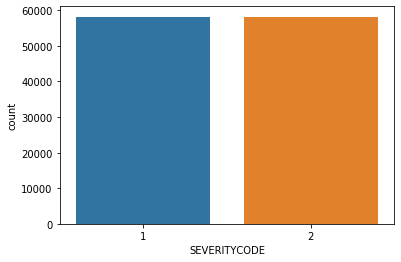

In [34]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
colData = X_resampled
colData['SEVERITYCODE'] = y_resampled

prop_damage = df[df.SEVERITYCODE == 1]
injury = df[df.SEVERITYCODE == 2]

print("NO of property damage incidents:" , len(prop_damage))
print("NO of Injury incidents", len(injury))

sns.countplot(x='SEVERITYCODE', data=colData)

In [35]:
#import train_test-split
#Split the data into training sets
from sklearn.model_selection import train_test_split
#import LabelEncoder as it works fine with categorical variables
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
LE= preprocessing.LabelEncoder()
#Extract the independent and target variables as x and y
X,y=features.values,target.values
#use fit_transform function to fit transformed target values
y=LE.fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### MODELING

###### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier()

###### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.0001, solver='liblinear')
model_lr.fit(X_train, y_train)
model_lr

LogisticRegression(C=0.0001, solver='liblinear')

###### SVM

In [38]:
from sklearn import svm

SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train)
SVM_model

SVC()

### EVALUATION

In [39]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import f1_score

import time
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import recall_score, roc_curve
from cf_matrix import make_confusion_matrix

In [40]:
# Decission tree 
yhat_tree = model_tree.predict(X_test)
cf_matrix_tree = confusion_matrix(y_test,yhat_tree)
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat_tree))

Test set Decission Tree Accuracy:  0.7036916543953974


In [41]:
Accuracy=metrics.accuracy_score(y_test, yhat_tree)
jaccard = jaccard_score(y_test, yhat_tree)
f1_score_tree = f1_score(y_test, yhat_tree, average='weighted')
precision_tree = precision_score(y_test, yhat_tree, average='weighted')
tree_report = ['Decision Tree', round(Accuracy,1), round(jaccard,1), round(f1_score_tree,1), round(precision_tree,1)]

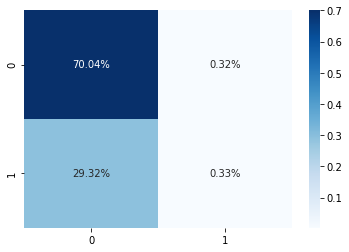

In [42]:
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:
#lOGISTIC REGRESSION
yhat_proba = model_lr.predict_proba(X_test)
yhat_lr = model_lr.predict(X_test)
cf_matrix_lr = confusion_matrix(y_test,yhat_lr)
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Logistic regression Accuracy:  0.7035889181877333


In [44]:
Accuracy=metrics.accuracy_score(y_test, yhat_lr)
jaccard = jaccard_score(y_test, yhat_lr )
f1_score_lr = f1_score(y_test, yhat_lr , average='weighted')
precision_lr = precision_score(y_test, yhat_lr , average='weighted')
lr_report = ['Logistic Regression', round(Accuracy,2), round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

C:\Users\jemab\OneDrive\Documents\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


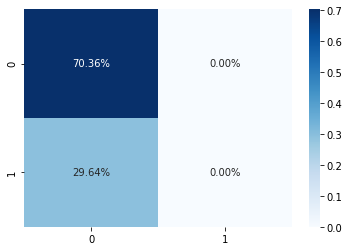

In [45]:
sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, 
            fmt='.2%', cmap='Blues')

In [46]:
#svm
yhat_svm = SVM_model.predict(X_test)
cf_matrix_svm=confusion_matrix(y_test,yhat_svm)
print("Test set SVM Accuracy: ", metrics.accuracy_score(y_test, yhat_svm))

Test set SVM Accuracy:  0.7037772679017842


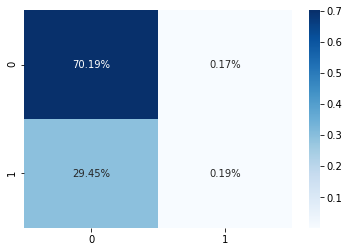

In [47]:
sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, 
            fmt='.2%', cmap='Blues')

In [49]:
Accuracy=metrics.accuracy_score(y_test, yhat_svm)
jaccard = jaccard_score(y_test, yhat_svm)
f1_score_lr = f1_score(y_test, yhat_svm, average='weighted')
precision_lr = precision_score(y_test, yhat_svm, average='weighted')
SVM_report = ['SVM', round(Accuracy,3), round(jaccard,3), round(f1_score_lr,3), round(precision_lr,3)]

In [50]:
report = pd.DataFrame(data=np.array([tree_report, lr_report, SVM_report]), 
                      columns=['Algorithm', 'Accuracy', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Accuracy,Jaccard,F1-score,Precision
0,Decision Tree,0.7,0.0,0.6,0.6
1,Logistic Regression,0.7,0.0,0.58,0.5
2,SVM,0.704,0.006,0.585,0.652
